<a href="https://colab.research.google.com/github/ParhamPishro/Solutions-of-FUM-Academic-Exercises/blob/main/Machine%20Learning/6_Word_Embedding_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import required libraries
import pandas as pd
import numpy as np
import re  # For preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
import gensim
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [ ]:
# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# Load Dataset
data = pd.read_excel('/content/IMDB Dataset.xlsx')

In [ ]:
data

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [ ]:
#Delete the sentiment column
data = data.drop(columns=['sentiment'])

In [ ]:
#Clean up sentences in the review column (for example: display all words in lowercase letters, remove punctuation, etc)
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = text.strip()  # Remove leading/trailing whitespace
    return text

In [ ]:
data['review'] = data['review'].apply(clean_text)

In [ ]:
#Identify important words using TF-IDF
vectorizer = TfidfVectorizer(max_features=100)  # Limit to top 100 important words
tfidf_matrix = vectorizer.fit_transform(data['review'])
important_words = vectorizer.get_feature_names_out()

In [ ]:
print("Important words using TF-IDF:")
print(important_words)

Important words using TF-IDF:
['about' 'after' 'all' 'also' 'an' 'and' 'any' 'are' 'as' 'at' 'bad' 'be'
 'because' 'been' 'br' 'but' 'by' 'can' 'characters' 'could' 'do' 'dont'
 'even' 'film' 'films' 'first' 'for' 'from' 'get' 'good' 'great' 'had'
 'has' 'have' 'he' 'her' 'him' 'his' 'how' 'if' 'in' 'into' 'is' 'it'
 'its' 'just' 'like' 'made' 'make' 'me' 'more' 'most' 'movie' 'movies'
 'much' 'my' 'no' 'not' 'of' 'on' 'one' 'only' 'or' 'other' 'out' 'people'
 'really' 'see' 'she' 'so' 'some' 'story' 'than' 'that' 'the' 'their'
 'them' 'then' 'there' 'they' 'think' 'this' 'time' 'to' 'too' 'up' 'very'
 'was' 'way' 'we' 'well' 'were' 'what' 'when' 'which' 'who' 'will' 'with'
 'would' 'you']


In [ ]:
#Create word vectors using Word2Vec

In [ ]:
!pip install nltk

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
import nltk
nltk.data.path.append('/path/to/nltk_data')
nltk.download('punkt', download_dir='/path/to/nltk_data')

[nltk_data] Downloading package punkt to /path/to/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
# Tokenize the reviews
data['tokens'] = data['review'].apply(word_tokenize)

LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - '/root/nltk_data'
    - '/usr/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
    - '/path/to/nltk_data'
    - '/path/to/nltk_data'
    - '/path/to/nltk_data'
**********************************************************************


In [ ]:
data['tokens'] = data['review'].apply(lambda x: x.split())


In [ ]:
#def remove_stopwords(tokens):
  #for word in tokens:
   # if word not in stop_words:
     # return word


In [ ]:
# Remove stopwords in token list
def remove_stopwords(tokens):
    return [word for word in tokens if word not in stop_words]

In [ ]:
data['tokens'] = data['tokens'].apply(remove_stopwords)

In [ ]:
# می توان کد بالا را به صورت زیر کوتاه تر نوشت
#stop_words = set(stopwords.words('english'))
#data['tokens'] = data['tokens'].apply(lambda x: [word for word in x if word not in stop_words])

In [ ]:
# Train Word2Vec model
w2v_model = Word2Vec(sentences=data['tokens'], vector_size=100, window=5, min_count=1, workers=4)

In [ ]:
# Example: Access the vector for a specific word
words_to_check = ['movie', 'film', 'story', 'dialogue']  # لیستی از کلمات
for word in words_to_check:
    if word in w2v_model.wv:
        print(f"Word vector for '{word}':", w2v_model.wv[word])
    else:
        print(f"'{word}' not found in the Word2Vec model.")

Word vector for 'movie': [-1.3372272   1.2986339  -0.9956534   0.71913224  0.577114    0.8727968
 -0.37680164 -0.4986355  -1.8394786  -1.8773483  -1.3814692  -0.9982465
  2.7793276   0.7759284  -0.31199268  0.44717243  2.032532   -0.18864547
 -0.03209206 -1.5501065   2.6358724   0.20080222 -0.64146453  0.52456087
  0.33340394 -0.61834496 -0.7226876   0.75147545  0.5239467   1.0980023
  1.6155298  -2.105197   -0.40812668 -2.1706116   1.3522213   1.0480683
  1.7225343  -1.5834148   0.42839634  0.3108228   2.6917288  -2.2044923
  1.1126335  -1.8726578   1.0362855  -1.0299906   1.6756582  -1.7156324
  1.088192   -1.0182091   1.4585971  -0.11779904 -0.8010898  -0.6441391
  2.6177955  -1.7571677   0.87186855  0.01019852 -0.6244865   2.4448283
 -0.42839214 -2.6380205   0.19603957  0.07228573 -0.6295387   2.0573711
 -0.4079978  -0.19291873  0.8585869   1.0776825  -1.3735367  -1.5687106
  0.40430427  2.6187842  -1.5832663  -1.8697679   1.1391933   1.3519626
  1.1042709   0.61941063 -1.4294721  

In [ ]:
# Step 5: Optional additional steps
# similarity between two words
w2v_model.wv.similarity("story","film")

0.3989079

In [ ]:
w2v_model.wv.similarity("movie","film")

0.8696597

In [ ]:
w2v_model.wv.similarity("movie","dialogue")

0.26658416

In [ ]:
w2v_model.wv.similarity("film","dialogue")

0.28972524

In [ ]:
print(w2v_model.wv.most_similar('movie'))

[('film', 0.8696596026420593), ('moviebr', 0.8165470957756042), ('filmbr', 0.7308852076530457), ('flick', 0.6759963035583496), ('movies', 0.6685640811920166), ('itbr', 0.6508605480194092), ('moviesbr', 0.5754178762435913), ('really', 0.5735077261924744), ('actually', 0.5727246999740601), ('guess', 0.5602433681488037)]


In [ ]:
print(w2v_model.wv.most_similar('dialogue'))

[('dialog', 0.9570610523223877), ('dialogues', 0.853699803352356), ('dialogs', 0.8469405770301819), ('delivery', 0.7547845244407654), ('trite', 0.7347692847251892), ('script', 0.7299858331680298), ('stilted', 0.7288073897361755), ('insipid', 0.7158811688423157), ('choppy', 0.714128851890564), ('overly', 0.7102129459381104)]


In [ ]:
print(w2v_model.wv.most_similar(positive=["movie"]))

[('film', 0.8696596026420593), ('moviebr', 0.8165470957756042), ('filmbr', 0.7308852076530457), ('flick', 0.6759963035583496), ('movies', 0.6685640811920166), ('itbr', 0.6508605480194092), ('moviesbr', 0.5754178762435913), ('really', 0.5735077261924744), ('actually', 0.5727246999740601), ('guess', 0.5602433681488037)]


In [ ]:
w2v_model.wv.most_similar(positive=["movie", "dialogue"], negative=["film"], topn=3)

[('dialog', 0.8912173509597778),
 ('dialogs', 0.7884747385978699),
 ('corny', 0.7478013634681702)]

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [ ]:
def display_pca_scatterplot(w2v_model, words):
    """
    این تابع نقاط کلمات را در فضای دو بعدی با استفاده از PCA نمایش می‌دهد.


    words: لیستی از کلمات موردنظر برای نمایش
    """
    # بررسی وجود کلمات در مدل
    word_vectors = []
    valid_words = []
    for word in words:
        if word in w2v_model.wv:
            word_vectors.append(w2v_model.wv[word])
            valid_words.append(word)

    # بررسی خالی نبودن بردارها
    if not word_vectors:
        print("No valid words found in the model!")
        return

    # کاهش ابعاد با PCA
    pca = PCA(n_components=2)
    word_vectors_2d = pca.fit_transform(word_vectors)

    # رسم نمودار
    plt.figure(figsize=(10, 8))
    plt.scatter(word_vectors_2d[:, 0], word_vectors_2d[:, 1], color='red', edgecolors='k')

    # افزودن برچسب‌ها
    for i, word in enumerate(valid_words):
        plt.annotate(word, xy=(word_vectors_2d[i, 0], word_vectors_2d[i, 1]), fontsize=10)

    plt.title("PCA Scatterplot of Word Embeddings")
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.grid()
    plt.show()

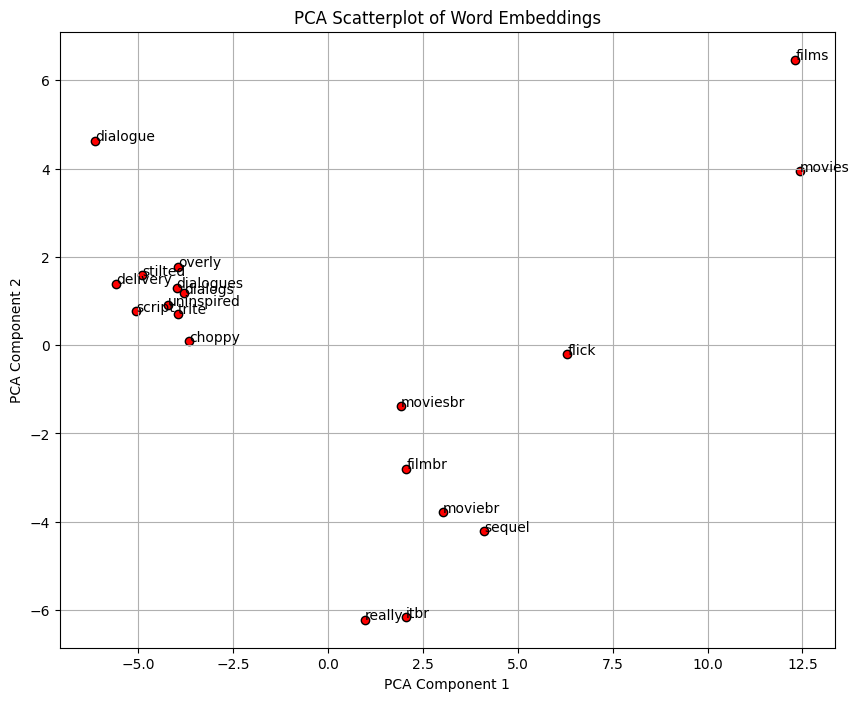

In [ ]:
display_pca_scatterplot(w2v_model,['dialogue','dialogs','dialogues','delivery','trite','script','uninspired','choppy','stilted',
                                 'overly','moviebr','filmbr','flick','movies','itbr','really','moviesbr','sequel','films'])

In [ ]:
# Step 5: Optional additional steps
# Generate average word vectors for each review
def average_word_vectors(tokens, model, vector_size):
    vectors = [model.wv[word] for word in tokens if word in model.wv]
    if len(vectors) > 0:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(vector_size)

data['avg_word_vector'] = data['tokens'].apply(lambda x: average_word_vectors(x, w2v_model, 100))

# Display the processed data
print(data.head())

                                              review  \
0  one of the other reviewers has mentioned that ...   
1  a wonderful little production br br the filmin...   
2  i thought this was a wonderful way to spend ti...   
3  basically theres a family where a little boy j...   
4  petter matteis love in the time of money is a ...   

                                              tokens  \
0  [one, reviewers, mentioned, watching, oz, epis...   
1  [wonderful, little, production, br, br, filmin...   
2  [thought, wonderful, way, spend, time, hot, su...   
3  [basically, theres, family, little, boy, jake,...   
4  [petter, matteis, love, time, money, visually,...   

                                     avg_word_vector  
0  [0.09470758, 0.113570124, -0.40050623, -0.1958...  
1  [0.057546224, 0.55938303, -0.42653385, 0.17194...  
2  [0.21072173, 0.20528585, -0.5248351, -0.104948...  
3  [-0.0145691205, 0.28338954, -0.73835385, -0.12...  
4  [-0.04892629, 0.3181804, -0.39887565, 0.272678..

In [ ]:
# Example: Access the vector for a specific word
word_vector = w2v_model.wv['movie'] if 'movie' in w2v_model.wv else None
print("Word vector for 'movie':", word_vector)

Word vector for 'movie': [-1.3372272   1.2986339  -0.9956534   0.71913224  0.577114    0.8727968
 -0.37680164 -0.4986355  -1.8394786  -1.8773483  -1.3814692  -0.9982465
  2.7793276   0.7759284  -0.31199268  0.44717243  2.032532   -0.18864547
 -0.03209206 -1.5501065   2.6358724   0.20080222 -0.64146453  0.52456087
  0.33340394 -0.61834496 -0.7226876   0.75147545  0.5239467   1.0980023
  1.6155298  -2.105197   -0.40812668 -2.1706116   1.3522213   1.0480683
  1.7225343  -1.5834148   0.42839634  0.3108228   2.6917288  -2.2044923
  1.1126335  -1.8726578   1.0362855  -1.0299906   1.6756582  -1.7156324
  1.088192   -1.0182091   1.4585971  -0.11779904 -0.8010898  -0.6441391
  2.6177955  -1.7571677   0.87186855  0.01019852 -0.6244865   2.4448283
 -0.42839214 -2.6380205   0.19603957  0.07228573 -0.6295387   2.0573711
 -0.4079978  -0.19291873  0.8585869   1.0776825  -1.3735367  -1.5687106
  0.40430427  2.6187842  -1.5832663  -1.8697679   1.1391933   1.3519626
  1.1042709   0.61941063 -1.4294721  